# Brute Force
We generate all possible combinations of all cities, and calculate the min distance between each city.

In [34]:
import numpy as np
np.random.seed(0)

number_of_cities = 3

# randomly generate coordinates for each city
coordinates = np.random.randint(0, 100, (number_of_cities, 2))


Optimal Path: (0, 1, 2)


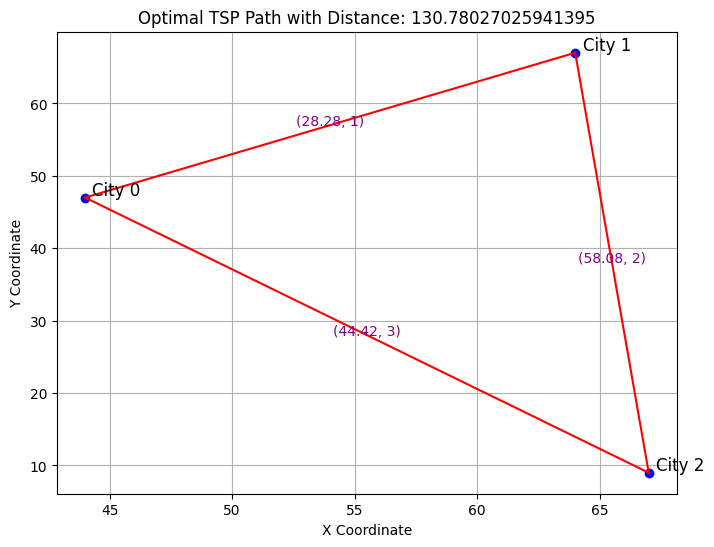

In [36]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Function to calculate the total distance for a given path
def calculate_total_distance(path, coordinates):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += euclidean_distance(coordinates[path[i]], coordinates[path[i + 1]])
    total_distance += euclidean_distance(coordinates[path[-1]], coordinates[path[0]])  # Return to the starting point
    return total_distance

# Brute force TSP solution
def tsp_brute_force(coordinates):
    n = len(coordinates)
    cities = list(range(n))
    min_path = None
    min_distance = float('inf')
    
    for perm in itertools.permutations(cities):
        current_distance = calculate_total_distance(perm, coordinates)
        if current_distance < min_distance:
            min_distance = current_distance
            min_path = perm
            
    return min_path, min_distance

# Solve the TSP
optimal_path, optimal_distance = tsp_brute_force(coordinates)

print(f"Optimal Path: {optimal_path}")

# Visualization with edge labels for distance and path sequence
def plot_tsp_path(optimal_path, coordinates):
    plt.figure(figsize=(8, 6))
    for i, coord in enumerate(coordinates):
        plt.scatter(coord[0], coord[1], color='blue')
        plt.text(coord[0] + 0.3, coord[1] + 0.3, f"City {i}", fontsize=12)
    
    # Plot the optimal path with labels for (Distance, Path Sequence Number)
    for seq_num in range(len(optimal_path)):
        start_city = optimal_path[seq_num]
        end_city = optimal_path[(seq_num + 1) % len(optimal_path)]
        
        # Plot the edge
        plt.plot([coordinates[start_city][0], coordinates[end_city][0]],
                 [coordinates[start_city][1], coordinates[end_city][1]], 'r-')
        
        # Midpoint of the edge for labeling
        mid_x = (coordinates[start_city][0] + coordinates[end_city][0]) / 2
        mid_y = (coordinates[start_city][1] + coordinates[end_city][1]) / 2
        
        # Label with (Distance, Path Sequence Number)
        edge_distance = euclidean_distance(coordinates[start_city], coordinates[end_city])
        plt.text(mid_x, mid_y, f"({edge_distance:.2f}, {seq_num + 1})",
                 fontsize=10, color='purple', ha='center')

    plt.title(f"Optimal TSP Path with Distance: {optimal_distance}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

# Plot the result
plot_tsp_path(optimal_path, coordinates)